In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.7.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.2.0
Warning message:
“package ‘dplyr’ was built under R version 3.4.4”Warning message:
“package ‘stringr’ was built under R version 3.4.4”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [62]:
malaria <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018-11-13/malaria_deaths.csv')
colnames(malaria) <- c('entity','code','year','deaths')

Parsed with column specification:
cols(
  Entity = col_character(),
  Code = col_character(),
  Year = col_integer(),
  `Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)` = col_double()
)


In [132]:
# entities to filter
entities_exclude <- c('Sub-Saharan Africa',
                      'World',
                      'Western Sub-Saharan Africa',
                      'Low SDI',
                      'Low-middle SDI',
                      'Eastern Sub-Saharan Africa',
                      'Central Sub-Saharan Africa')

In [120]:
malaria %>%
 filter(!entity %in% entities_exclude)  %>% 
 group_by(entity)%>%
 mutate(death_change = c(0,diff(deaths)))  %>% 
 ungroup()  %>% 
 mutate(abs_death_change = abs(death_change))  %>% 
 arrange(desc(abs_death_change))   %>% 
 head(50) ->
 top50_change

top50_change$index <- c(dim(top50_change)[1]:1)

In [72]:
top50_change  %>%  head

entity,code,year,deaths,death_change,abs_death_change
Burundi,BDI,2005,110.76412,-33.43733,33.43733
Papua New Guinea,PNG,2000,73.44084,32.35021,32.35021
Equatorial Guinea,GNQ,2006,149.06575,-31.21619,31.21619
Solomon Islands,SLB,2000,73.38546,29.35162,29.35162
Malawi,MWI,2000,111.04128,-26.63320,26.63320
Equatorial Guinea,GNQ,2014,112.77477,-26.19353,26.19353


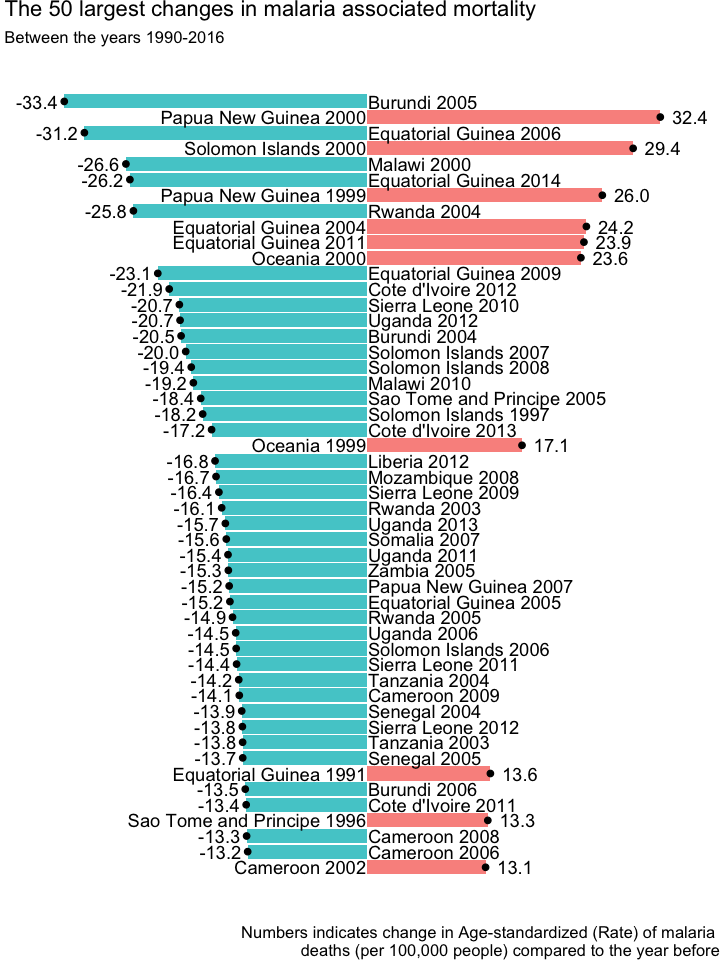

In [153]:
options(repr.plot.width=6, repr.plot.height=8)

top50_change  %>% 
    ggplot(aes(x = index, y = death_change, fill = death_change < 0)) +
    geom_col(alpha = 0.8) +
    geom_point() +
    geom_text(aes(label = format(death_change, digits = 3)),
              nudge_y = ifelse(top50_change$death_change < 0, -3, 3)) +
    geom_text(aes(y = 0, label = paste(entity, year)),
              hjust = ifelse(top50_change$death_change < 0, 0, 1),
              nudge_y = ifelse(top50_change$death_change < 0, 0.1, -0.1)) +
    coord_flip() +
    theme_void() +
    guides(fill = FALSE) + 
    labs(title = 'The 50 largest changes in malaria associated mortality',
         subtitle = 'Between the years 1990-2016',
         caption = 'Numbers indicates change in Age-standardized (Rate) of malaria \n deaths (per 100,000 people) compared to the year before')